# 1. Get cleaned example data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Dimensionality Reduction : T-SNE algorithm 
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples

In [41]:
from load_data import load_data

In [ ]:
# deal with 1000p 

In [9]:
from load_data import load_data
data1_path = "./actor_words.csv"
data2_path = "./actors_70s.csv"
df_1000p = load_data(data1_path, data2_path)
df_1000p.head()

,actor_id,actor_name,words
0,nm0005211,Danica McKellar,danica mckellarmckellar 2018u. . nation book f...
1,nm0005576,Drea de Matteo,drea de matteod matteo 2005bornandrea donna de...
2,nm0028846,Shawn Andrews,"american footbal guard tackl actor , see shawn..."
3,nm0036571,Monica,"look monica monica wiktionari , free dictionar..."
4,nm0038875,John Asher,thi biographi live person need addit citat ver...


In [10]:
vectorizer_tmp = TfidfVectorizer(max_features=1000)
X_tmp = vectorizer_tmp.fit_transform(df_1000p['words'])
features = vectorizer_tmp.get_feature_names()

In [14]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

mms = MaxAbsScaler()
mms.fit(X_tmp)
data_transformed = mms.transform(X_tmp)

Sum_of_squared_distances = []
K = range(2,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

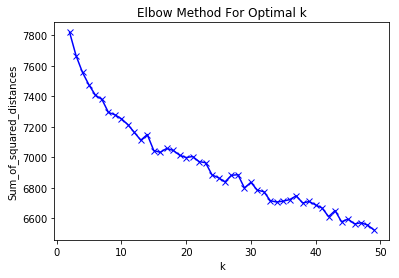

In [15]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
X_tmp = vectorizer.fit_transform(df_1000p['words'])

silhouette = []
K = range(2,50)
for k in K:

    y = KMeans(k).fit_predict(X_tmp)
    
    if k>1:
        silhouette.append( silhouette_score(X_tmp,y) )
    else:
        silhouette.append(0)

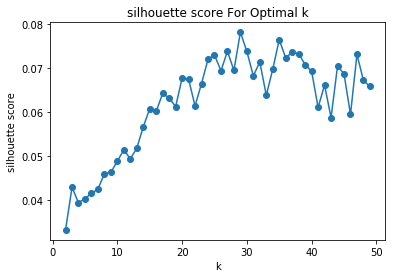

In [19]:
plt.plot(K, silhouette, 'o-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('silhouette score For Optimal k')
plt.show()

# 2. Feature And Model

In [5]:
data1_path = "./c/actor_words_all.csv"
data2_path = "./actors_70s.csv"
df_all = load_data(data1_path, data2_path)
df_all.head()

,actor_id,actor_name,words
0,nm0005211,Danica McKellar,danica mckellarmckellar 2018u. . nation book f...
1,nm0005576,Drea de Matteo,drea de matteod matteo 2005bornandrea donna de...
2,nm0011589,Amanda Aday,amanda adaybornamanda lee aday ( 1981-01-21 ) ...
3,nm0028846,Shawn Andrews,"american footbal guard tackl actor , see shawn..."
4,nm0036571,Monica,"look monica monica wiktionari , free dictionar..."


In [6]:
df_all.shape

(10847, 3)

In [27]:
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df_all['words'])
features = vectorizer.get_feature_names()

In [29]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

mms = MaxAbsScaler()
mms.fit(X)
data_transformed = mms.transform(X)

Sum_of_squared_distances = []
silhouette = []

K = range(5, 50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    
    Sum_of_squared_distances.append(km.inertia_)
    
    y = KMeans(k).fit_predict(X)
    silhouette.append( silhouette_score(X,y) )

MemoryError: 

In [23]:
print(f'{len(Sum_of_squared_distances)} Sum_of_squared_distances :\n  {Sum_of_squared_distances}')
print('--------')
print(f'{len(silhouette)} silhouette scores :\n  {silhouette}')

20 wcss :
  [761.959599555976, 757.3751897304348, 758.8787186592715, 759.3463327034674, 762.0252413194772, 760.4572002443349, 760.1313913648579, 759.7217345109083, 759.2888024020291, 758.3697731556534, 758.1911764529524, 762.108673545336, 762.0862908925944, 757.9272699257814, 758.683169027932, 760.1096127654469, 762.0846204286497, 760.5675197840235, 760.0796449858623, 758.553687162813]
--------
20 silhouette scores :
  [0.06594388500159855, 0.0672199248107409, 0.06607319319542859, 0.06198969332592848, 0.06498435239417577, 0.06377686099245419, 0.062359134747302036, 0.06706052679315636, 0.06540820106431847, 0.06745115460846401, 0.06824174217310104, 0.06139819558920832, 0.06089541372609433, 0.06768913315264129, 0.0673245249944558, 0.06125209467864119, 0.05968615734042653, 0.06362660156504632, 0.060687583414125945, 0.06720396978854032]


In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
plt.plot(K, silhouette, 'o-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('silhouette score For Optimal k')
plt.show()

In [35]:
n_clusters = 50

vectorizer = TfidfVectorizer(max_features=500)
X_all = vectorizer.fit_transform(df_all['words'])
features = vectorizer.get_feature_names()

kmeans_all = KMeans(n_clusters)
kmeans_all.fit(X_all)

print("kmeans n_cluster=　{}, inertia: {}".format(n_clusters, kmeans_all.inertia_))


top_centroids = kmeans_all.cluster_centers_.argsort()[:,-1:-21:-1]
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

kmeans n_cluster=　50, inertia: 7065.61174841156
0: 1981, film, actor, seri, american, born, role, known, age, actress, best, california, televis, star, march, pres, drama, octob, angel, august
1: nba, basketbal, team, all, bat, basebal, player, leagu, career, play, right, game, run, major, profession, draft, season, award, highlight, pick
2: 1978, sourc, live, remov, person, verif, reliabl, addit, need, unsourc, citat, contenti, materi, poorli, must, libel, ad, potenti, especi, immedi
3: 1989, 30, 29, actress, seri, role, american, born, age, film, pres, known, 21, june, actor, star, california, march, model, drama
4: redirect, thoma, list, tv, life, robert, band, seri, mike, joseph, daniel, film, topic, american, season, charl, brother, mark, jame, famili
5: footbal, born, american, chri, refer, player, may, politician, english, actor, basebal, jame, cricket, australian, rugbi, british, jason, adam, musician, ice
6: album, record, releas, music, singer, songwrit, singl, rock, debut, p

In [32]:
tfidf_weight_all = X_all.toarray()
tfidf_weight_all, tfidf_weight_all.shape

(array([[0.        , 0.10127818, 0.        , ..., 0.11670337, 0.        ,
         0.        ],
        [0.        , 0.094997  , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.14778943, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), (10847, 500))

In [36]:
# Dimensionality Reduction : T-SNE algorithm 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight_all)

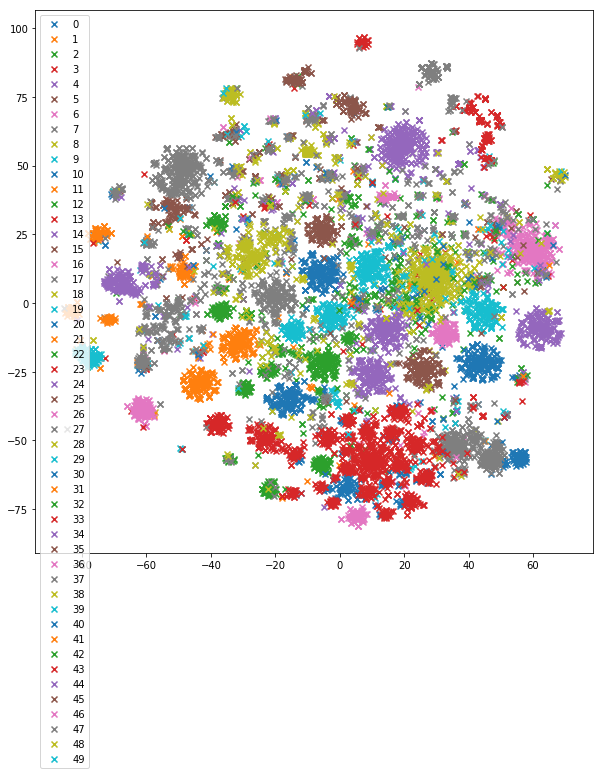

In [38]:
fig = plt.figure(figsize=(10, 10))

for color in range(0,n_clusters):
    label = []
    x = []
    y = []
    
    for i in range(len(kmeans_all.labels_)):
        if kmeans_all.labels_[i] == color:
            x.append(decomposition_data[i][0])
            y.append(decomposition_data[i][1])

    plt.scatter(x, y, label=color, marker="x")

plt.legend()
plt.savefig('./kmeans_all_data_50clusters.png', aspect=1)

In [39]:
print("random sample of name_id in each cluster(total {} clusters)".format(n_clusters))
assigned_cluster = kmeans_all.transform(X_all).argmin(axis=1)

for i in range(kmeans_all.n_clusters):
    cluster = np.arange(0, X_all.shape[0])[assigned_cluster==i]
    sample_name_id = np.random.choice(cluster, 5, replace=False)
    print("cluster %d:" % i)
    for name_id in sample_name_id:
        actor_name_id = df_all.loc[name_id]['actor_id']
        name = df_all.loc[name_id]['actor_name']

        print( "       {}, {}. ".format(actor_name_id, name) )

random sample of name_id in each cluster(total 50 clusters)
cluster 0:
       nm1265802, Josh Gad. 
       nm0005232, Izabella Miko. 
       nm2591010, Dan Levy. 
       nm2521967, Dyana Liu. 
       nm2356421, Alexander Fehling. 
cluster 1:
       nm1625398, Matt Fitzgerald. 
       nm4595689, Tommy Nelms. 
       nm1842797, Vince Carter. 
       nm2172860, Kim Allen. 
       nm0307812, Kevin Garnett. 
cluster 2:
       nm0409430, Manu Intiraymi. 
       nm1334752, Kimberley Locke. 
       nm1136435, Courtney Henggeler. 
       nm0162233, Natalia Cigliuti. 
       nm1195347, Monica Lo. 
cluster 3:
       nm2564938, Adelaide Clemens. 
       nm1273957, Paula Brancati. 
       nm2854802, Angelababy. 
       nm5147126, Eric Frank. 
       nm2503064, Logan Browning. 
cluster 4:
       nm2799338, Steven A. Miller. 
       nm3103061, Ida Lundgren. 
       nm0335242, Teach Grant. 
       nm0787227, Mark Shady. 
       nm1019004, Aimee Sweet. 
cluster 5:
       nm3888338, Chris Murrah. 
     

       nm0257891, John Ennis. 
cluster 47:
       nm1952522, Mike Jones. 
       nm4228675, Michael James. 
       nm0337751, Dan Green. 
       nm4416079, Mike Smith. 
       nm0416449, Drew James. 
cluster 48:
       nm3390771, Sam M. Hall. 
       nm1783451, Randy Robinson. 
       nm1995680, Paul Jene. 
       nm1982689, Mary Cobb. 
       nm2486579, Elena Rivera. 
cluster 49:
       nm2002159, Brayden Pierce. 
       nm3158974, Cody Horn. 
       nm0473873, Cherami Leigh. 
       nm1813129, Paydin LoPachin. 
       nm1675320, Marcel Miller. 


# use def- k_means.py

In [52]:
from k_means import tf_idf, kmeans, plot_clusters
from sklearn.cluster import KMeans

In [59]:
# %load k_means.py
%run k_means.py

In [53]:
X, features = tf_idf(df_all['words'], 500)

In [60]:
n_clusters = 50
kmeans, top_centroids = kmeans(n_clusters, X, features)

kmeans n_cluster=　50, inertia: 7041.873792080716
0: martial, mix, art, lb, record, cm, artist, championship, st, kg, champion, unit, ft, black, profession, american, former, wrestl, retir, year
1: 1972, sourc, live, remov, person, reliabl, verif, must, addit, contenti, poorli, citat, need, unsourc, libel, potenti, especi, immedi, materi, biographi
2: redirect, list, thoma, tv, life, robert, band, seri, mike, joseph, daniel, film, topic, brown, charact, american, season, charl, brother, mark
3: william, refer, may, disambigu, name, born, michael, footbal, link, american, mike, news, see, redirect, peopl, cricket, award, jame, brian, articl
4: american, new, state, univers, born, age, see, 1990, unit, known, 1989, actress, work, use, york, serv, first, name, also, januari
5: 1975, actor, film, age, born, seri, role, televis, american, known, actress, produc, april, august, presentspous, best, director, show, march, pres
6: album, record, releas, music, singer, singl, songwrit, rock, debu

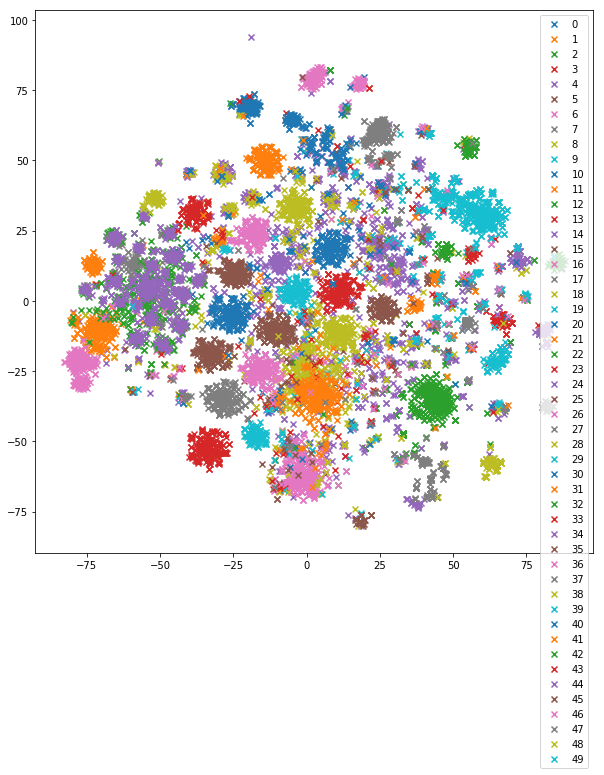

In [61]:
plot_clusters(X, n_clusters, kmeans)